# Assignment 2 - Epipolar Geometry and 3D Reconstruction 

First name: Alice 
<br>
Last name: Fornaciari
<br>
Matriculation number: 110068805

In [2]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from data import load_homogeneous_coordinates
from utils import eight_points_algorithm, right_epipole, left_epipole, plot_epipolar_line

# va fatto ???????? left_epipole ????????????

## Part I: The Eight Point Algorithm

### Load Data

In [3]:
data_dir = './merton_college/'
img1, img2, x1, x2 = load_homogeneous_coordinates(data_dir)

### Estimate the fundamental matrix F

In [4]:
F = eight_points_algorithm(x1, x2) #x1 and x2 are the homogenwous coordinates of the projection points
assert np.linalg.matrix_rank(F) == 2
 #DISPLAY the Fundammental matrix
print('Estimated fundamental matrix F: ')
print(F)

F normalized =  [[-2.97719762e-04 -1.41203965e-02  1.12224287e-02]
 [ 4.28906639e-02  1.81697417e-03 -6.98349967e-01]
 [-3.26769205e-02  7.13492222e-01 -2.52910473e-04]]
F_n = [[-4.52363463e-05 -1.41088294e-02  1.12379671e-02]
 [ 4.28947251e-02  1.81716023e-03 -6.98349717e-01]
 [-3.26719381e-02  7.13492450e-01 -2.52603849e-04]]
Estimated fundamental matrix F: 
[[-1.13842131e-09 -3.55063867e-07  1.46207354e-04]
 [ 1.07949189e-06  4.57307917e-08 -4.05769576e-03]
 [-4.48937328e-04  3.80280565e-03  1.59619094e-01]]


### Plot epipoles and epipolar lines

In [5]:
# compute the epipole
# TODO: implement this function
e = right_epipole(F)  
e_left= left_epipole(F.T) #to compute the left epipole I use F.T analogous to F.transpose()


Right epipole = [3.74195816e+03 3.99779989e+02 1.00000000e+00]
Left epipole = [1.07652274e+04 4.27231269e+02 1.00000000e+00]


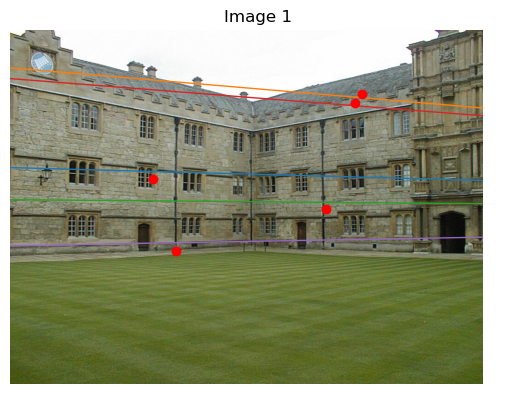

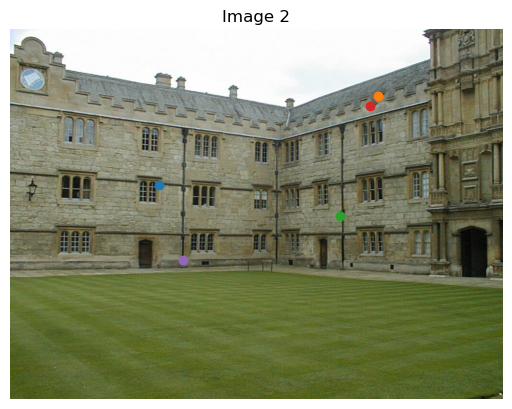

In [6]:
plt.figure()
plt.imshow(img1)
plt.title('Image 1')

# plot each line individually, this gives nice colors
for i in range(100, 105): 
    plot_epipolar_line(img1, F.T, x2[:, i], e, ax=None, show_epipole=False)

plt.axis('off')
plt.figure()
plt.imshow(img2)
plt.title('Image 2')

#for i in range(100, 105): 
#    plot_epipolar_line(img2, F.T, x2[:, i], e_left, ax=None, show_epipole=True)

# plot each point individually, this gives same colors as the lines 
for i in range(100, 105):
    plt.plot(x2[0, i], x2[1, i], 'o')
    plt.axis('off')

In [18]:
# ????????? cosa devo fare???????????
%matplotlib notebook
from ipywidgets import *

fig, ax = plt.subplots()
ax.imshow(img1)

fig2, ax2 = plt.subplots()
ax2.imshow(img2)

def onclick(event):
    ax.plot(event.xdata, event.ydata, 'o')
    plot_epipolar_line(img2, F, np.array([event.xdata, event.ydata, 1]), e, ax2)
    ax2.imshow(img2)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

ModuleNotFoundError: No module named 'ipywidgets'